# Capstone Project - Car Accident Severity
### Applied Data Science Capston by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

According to the **World Health Organization** there were approximately **1.35 million people killed** on roadways around the world. Averagely there are almost **3,700 people killed globally in road traffic crashes**. It was estimated to be the eighth leading cause of death globally for all age groups and the leading cause of death for children and young people 5-29 years of age. **National Highway Traffic Safety Administration (NHTSA)** data shows that in United States alone in year 2018, there were around 50,000 deaths from car accident and 4 million accidents that causes disabling and non-disabling injuries. The **causes of accident ranges from weather condition, driver condition to road condition**. By being able to predict the severity of accident based on several conditions, it could help insurance company to calculate the risk of the insurer based on the route they frequently used and the weather condition of their area. This machine learning project could also **suggest navigation systems on which route is the safest to the road users**.  

## Data <a name="data"></a>

The data set used met the following criteria: 
1.	The target or label columns should be accident " severity" in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. 
2.	The machine learning model should be able to predict accident "severity"
3.	To build a good model, the dataset should be rich and contain many observations (rows) and various attributes (columns)

The data was obtained from Seattle City Geo Data. The data records all types of collisions from year 2004 to Present. Collisions are displayed at the intersection or mid-block of a segment. The data contains speed, light condition, road condition etc. The purpose of the project is to use machine learning to predict the severity of an accident based on the datasets that was given. The dataset "Data-Collisions.csv" was provided by SDOT Traffic Management Division, Traffic Records Group.

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data-Collisions.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Methodology <a name="methodology"></a>

In this project, we would determine the data that would be used for prediction car accident severity. The severity code is coded with 1 and 2 where 1 is prop damage and 2 for injury. 

First step, we would clean the data and remove data that are irrelevant such as the descriptions of the accidents or codes of the accidents. 
Second, we would perform some data analysis to further determine data that were needed or dropped. 

We are going to be replacing N with 0 and Y with 1 to ease data modeling process.

In [3]:
# replace N with 0 and Y with 1
df['HITPARKEDCAR'].replace({'N':0,'Y':1},inplace=True)
df['HITPARKEDCAR'].fillna(0,inplace=True)

We are dropping data that are not relevant to the data modeling. 

In [4]:
#drop data that are not in consideration for data modeling 
data = df.drop(['SEVERITYCODE','OBJECTID','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','ADDRTYPE','INCDTTM','X','Y','REPORTNO','INCDATE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','SDOT_COLDESC','STATUS','INTKEY','LOCATION','INCKEY','SEVERITYCODE.1','COLDETKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','ST_COLCODE','ST_COLDESC','ST_COLDESC','SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY','UNDERINFL','SPEEDING','INATTENTIONIND','PEDROWNOTGRNT'],axis = 1)

Creating dummies using one hot encoding to include nominal variables in a model. All the data would be joined into the same data subsequently.

In [5]:
#create dummies for data that is used for data modeling
add = pd.get_dummies(df['ADDRTYPE'])
col = pd.get_dummies(df['COLLISIONTYPE'])
junc = pd.get_dummies(df['JUNCTIONTYPE'])
light = pd.get_dummies(df['LIGHTCOND'])
road = pd.get_dummies(df['ROADCOND'])
weather = pd.get_dummies(df['WEATHER'])

In [6]:
data = data.join(add)

In [7]:
data = data.join(col)

In [8]:
data = data.join(junc)

In [9]:
data = data.join(light,lsuffix='_jtype',rsuffix='_lcond')

In [10]:
data = data.join(road,rsuffix='_rcond')

In [11]:
data = data.join(weather,rsuffix='_wea' )

In [12]:
X = data
X[0:5]

,HITPARKEDCAR,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other_jtype,Parked Car,...,Clear,Fog/Smog/Smoke,Other_wea,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown_wea
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


The data was normalized for then split into train and test data. 

In [13]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[-0.19619929, -0.06223095, -1.36876932,  1.41129279,  2.14811072,
        -0.16915004, -0.10249953, -0.27517219, -0.37234172, -0.57196238,
        -0.18744809, -0.46074827, -0.12417149, -0.32510694, -0.10437651,
         1.44892892, -0.2408193 , -0.36412936, -0.92535062, -0.02921369,
        -0.00679952, -0.08920831, -0.07872239, -0.576075  , -0.00751719,
        -0.1141037 ,  0.82233559, -0.17682024, -0.03476509, -0.27267986,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -0.28988624]])

In [14]:
y=df['SEVERITYCODE'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 50) (155738,)
Test set: (38935, 50) (38935,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#using random forest for training data 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Training accuracy for Random Forest:", round(acc_random_forest,2,), "%")

Training accuracy for Random Forest: 75.28 %


In [18]:
#using random forest for testing data
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Testing accuracy for Random Forest:", round(acc_random_forest,2,), "%")

Testing accuracy for Random Forest: 75.05 %


Using Random Forest method to calculate the importance of features relative to each other. A graph was then plot to visualize the importance. 

In [19]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Parked Car,0.206
Pedestrian,0.183
Cycles,0.143
Rear Ended,0.067
Sideswipe,0.060
Intersection,0.040
At Intersection (intersection related),0.040
Other_jtype,0.026
Block,0.021


<AxesSubplot:xlabel='feature'>

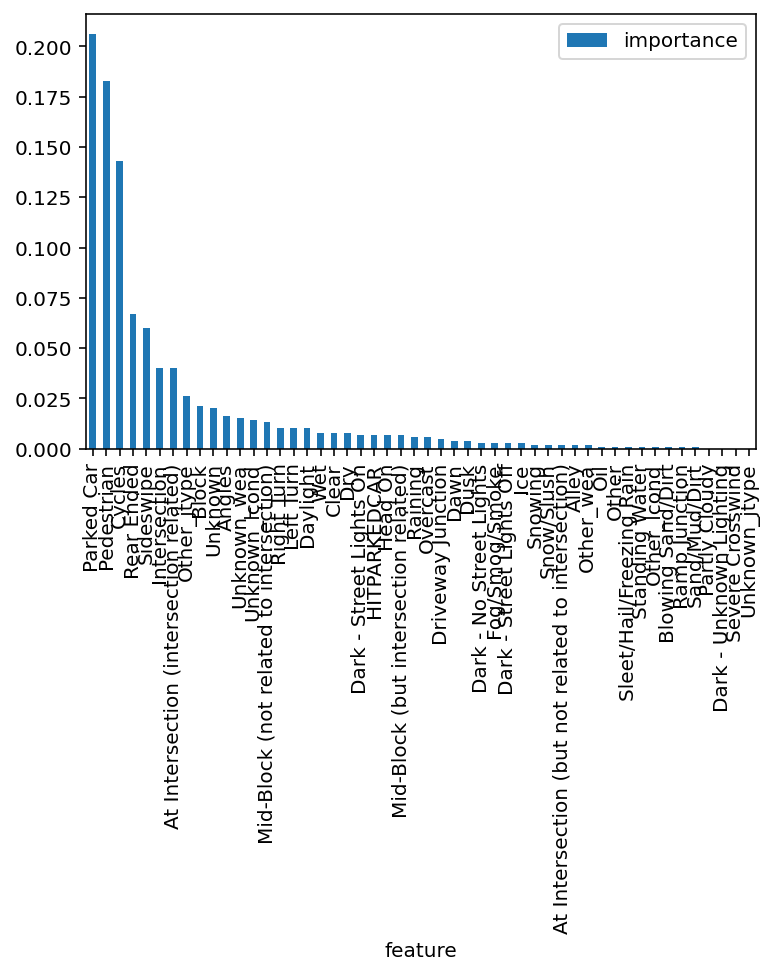

In [20]:
importances.plot.bar(stacked=False)

In [21]:
#Decision Tree Classifier 
d_range = range(3,7)
f1=[]

for d in d_range:
    dec_tree = DecisionTreeClassifier(criterion="entropy",max_depth = d)
    dec_tree.fit(X_train,y_train)
    predTree = dec_tree.predict(X_test)
    f1.append(f1_score(y_test,predTree,average='weighted'))
    
result = pd.DataFrame(f1,index = ['3','4','5','6'])
result.columns=['F1-score']
result

,F1-score
3,0.689341
4,0.689341
5,0.689315
6,0.689198


In [22]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
yhat = DT.predict(X_test)
print("F1 score for test data:", round(f1_score(y_test,yhat)*100,2,), "%")

F1 score for test data: 84.93 %


## Results and Discussion <a name="results"></a>

By running the model and using Decision Tree and Random Forest, it was calculated that Random Forest has a training accuracy of 75.28% while it has a testing accuracy of 75.03%. By having a Decision Tree of depth 3, the F1 score for the test set was calculated to be 84.93% compared to the F1 score for train set at 68.93% which is similar to when the modeled data including it.

The remaining data could be recorded better such as Speeding or Inattention Individual as they could provide significant changes to the data modeled. Data such as Date were not included into data modeling as they were consistent throughout everyday and it will just add extra processing load onto the machine. 

Further studies include reducing more data that does not contribute to the data modeling as it is not that important. Another important feature of Random Forest is that it could measure the relative importance of each feature. It computes the score for each feature and scale the result so that the sum of all importance were equal to 1. 


## Conclusion <a name="conclusion"></a>

In this study, the relation between several data sets and the severity of accidents were found. The data used has a direct correlation on the severity of the accidents. This model could be very useful for the Seattle Department of Transportation as they could use it to determine red zones for accident and could deploy more staffs on maintaining the safeness of road users based on certain conditions. 

The department responsible could also improve or maintain the infrastructure of the road such as the light conditions or the road conditions.

Road users could also determine the risk of driving when route planning as to avoid certain conditions that could result in an accident.